<a href="https://colab.research.google.com/github/shamim237/Football-Match-Outcome-Prediction/blob/main/Football_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Match Outcome Prediction using Artificial Neural Network (ANN
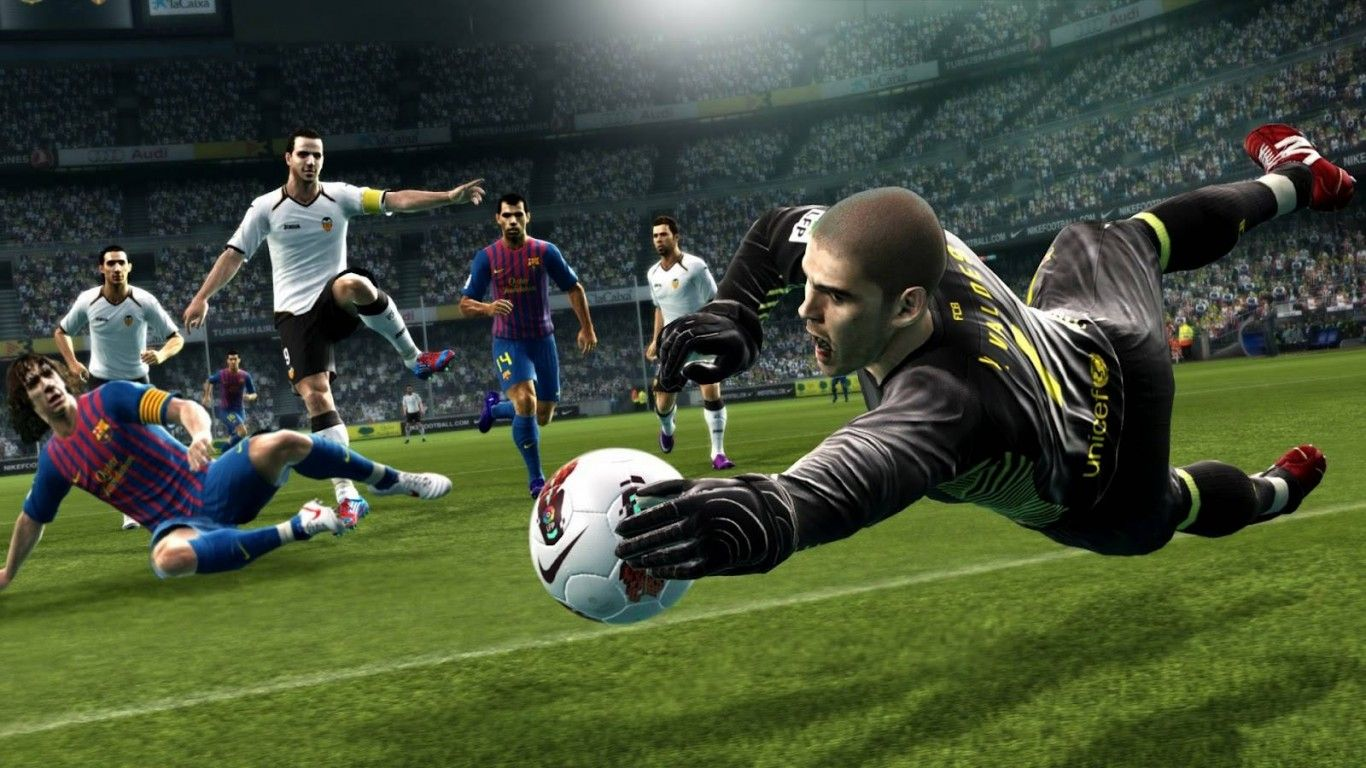

# Import required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# import required libraries for creating the ANN model and training the model
import keras
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#import tensorflow_addons as tfa
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


# Load and cleaning dataset 

In [ ]:
#import dataset

df = pd.read_csv('/content/drive/MyDrive/Football Outcome Prediction/LaLiga_Matches_1995-2020 (2).csv')
df.head(10)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2,0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D
5,1995-96,3/9/1995,Espanol,Salamanca,3,1,H,2,1,H
6,1995-96,3/9/1995,Merida,Betis,1,1,D,1,1,D
7,1995-96,3/9/1995,Sevilla,Tenerife,0,1,A,0,0,D
8,1995-96,3/9/1995,Valladolid,Barcelona,0,2,A,0,0,D
9,1995-96,3/9/1995,Vallecano,Real Madrid,1,5,A,0,1,A


In [ ]:
df.shape  #shape of the dataset- 9662 rows and 10 columns

(9662, 10)

In [ ]:
df.dtypes #types of the dataset features

Season      object
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
dtype: object

In [ ]:
df["FTR"].value_counts() #value distribution of Full time results

H    4613
A    2597
D    2452
Name: FTR, dtype: int64

In [ ]:
cleanup_nums = {"FTR":     {"H": 1, "D": 0, "A": 2}, # assign numeric values to FTR and HTR columns
                "HTR": {"H": 1, "D": 0, "A": 2 }}    # Home win = 1, Draw = 0 and Away Win = 2

In [ ]:
df = df.replace(cleanup_nums) #replace the numeric values of FTR and HTR to the dataset
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,1,2,0,1
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,1,3,0,1
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,1,2,0,1
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,1,1,1,0
4,1995-96,3/9/1995,Celta,Compostela,0,1,2,0,0,0


In [ ]:
df.dtypes #updated data types of the dataset

Season      object
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR          int64
HTHG         int64
HTAG         int64
HTR          int64
dtype: object

In [ ]:
df["HomeTeam"] = df["HomeTeam"].astype('category')  # convert object type column (HomeTeam and AwayTeam) as category dtype
df["AwayTeam"] = df["AwayTeam"].astype('category')
df.dtypes

Season        object
Date          object
HomeTeam    category
AwayTeam    category
FTHG           int64
FTAG           int64
FTR            int64
HTHG           int64
HTAG           int64
HTR            int64
dtype: object

In [ ]:
df["HomeTeam"] = df["HomeTeam"].cat.codes #replce the HomeTeam after LabelEncoding
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,21,Valencia,3,0,1,2,0,1
1,1995-96,2/9/1995,39,Albacete,3,0,1,3,0,1
2,1995-96,3/9/1995,3,Santander,4,0,1,2,0,1
3,1995-96,3/9/1995,4,Sociedad,4,1,1,1,1,0
4,1995-96,3/9/1995,8,Compostela,0,1,2,0,0,0


In [ ]:
# check unique numbers for HomeTeam columns, each team contains 
# unique values, as the highest value is 47, so there are 47 unique teams


df['HomeTeam'].unique()   

array([21, 39,  3,  4,  8, 13, 28, 37, 42, 43, 47,  1,  5,  6, 33,  9, 32,
       35, 36, 38, 40, 41, 19, 25, 14, 27,  0, 44, 26, 30, 22, 31, 45, 34,
       29, 15, 24,  7, 16,  2, 46, 18, 12, 11, 10, 23, 17, 20], dtype=int8)

In [ ]:
df["AwayTeam"] = df["AwayTeam"].cat.codes   # replce the AwayTeam column after LabelEncoding
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,21,41,3,0,1,2,0,1
1,1995-96,2/9/1995,39,1,3,0,1,3,0,1
2,1995-96,3/9/1995,3,36,4,0,1,2,0,1
3,1995-96,3/9/1995,4,38,4,1,1,1,1,0
4,1995-96,3/9/1995,8,9,0,1,2,0,0,0


In [ ]:
# check unique numbers for AwayTeam columns, each team contains 
# unique values, as the highest value is 47, so there are 47 unique teams

df['AwayTeam'].unique()   

array([41,  1, 36, 38,  9, 35,  6, 40,  5, 33, 32, 37, 28, 47,  3, 21, 43,
        8,  4, 39, 13, 42, 14, 25, 19, 27, 44,  0, 26, 30, 45, 31, 22, 34,
       29, 24, 15,  7, 16,  2, 46, 18, 12, 10, 11, 23, 17, 20], dtype=int8)

In [ ]:
df = df.drop('Date', 1)  # remove the date column from dataset as it is unnecessary features
df = df.drop('Season', 1) # remove the Season column from dataset as it is unnecessary features

In [ ]:
df.head(30)  # updated and final dataset representation

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,21,41,3,0,1,2,0,1
1,39,1,3,0,1,3,0,1
2,3,36,4,0,1,2,0,1
3,4,38,4,1,1,1,1,0
4,8,9,0,1,2,0,0,0
5,13,35,3,1,1,2,1,1
6,28,6,1,1,0,1,1,0
7,37,40,0,1,2,0,0,0
8,42,5,0,2,2,0,0,0
9,43,33,1,5,2,0,1,2


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

print(df) #full view of the final dataset

      HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR
0           21        41     3     0    1     2     0    1
1           39         1     3     0    1     3     0    1
2            3        36     4     0    1     2     0    1
3            4        38     4     1    1     1     1    0
4            8         9     0     1    2     0     0    0
5           13        35     3     1    1     2     1    1
6           28         6     1     1    0     1     1    0
7           37        40     0     1    2     0     0    0
8           42         5     0     2    2     0     0    0
9           43        33     1     5    2     0     1    2
10          47        32     1     0    1     1     0    1
11           1        37     3     2    1     2     1    1
12           5        28     2     2    0     1     1    0
13           6        47     3     1    1     2     0    1
14          33         3     1     2    2     0     0    0
15           9        21     4     0    1     2     0   

In [ ]:
df.shape # updated shape of final dataset

(9662, 8)

In [ ]:
df.describe() # updated min/max/std values of the dataset

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
count,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000
mean,24.026496,24.028359,1.569758,1.117988,1.015007,0.693231,0.484268,0.798592
std,14.879710,14.881209,1.311628,1.118647,0.722767,0.843071,0.697424,0.777096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,26.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,38.000000,38.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,47.000000,47.000000,10.000000,8.000000,2.000000,6.000000,6.000000,2.000000


In [ ]:
df.isnull().sum()  # check the null values

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
dtype: int64

# Explore the final dataset

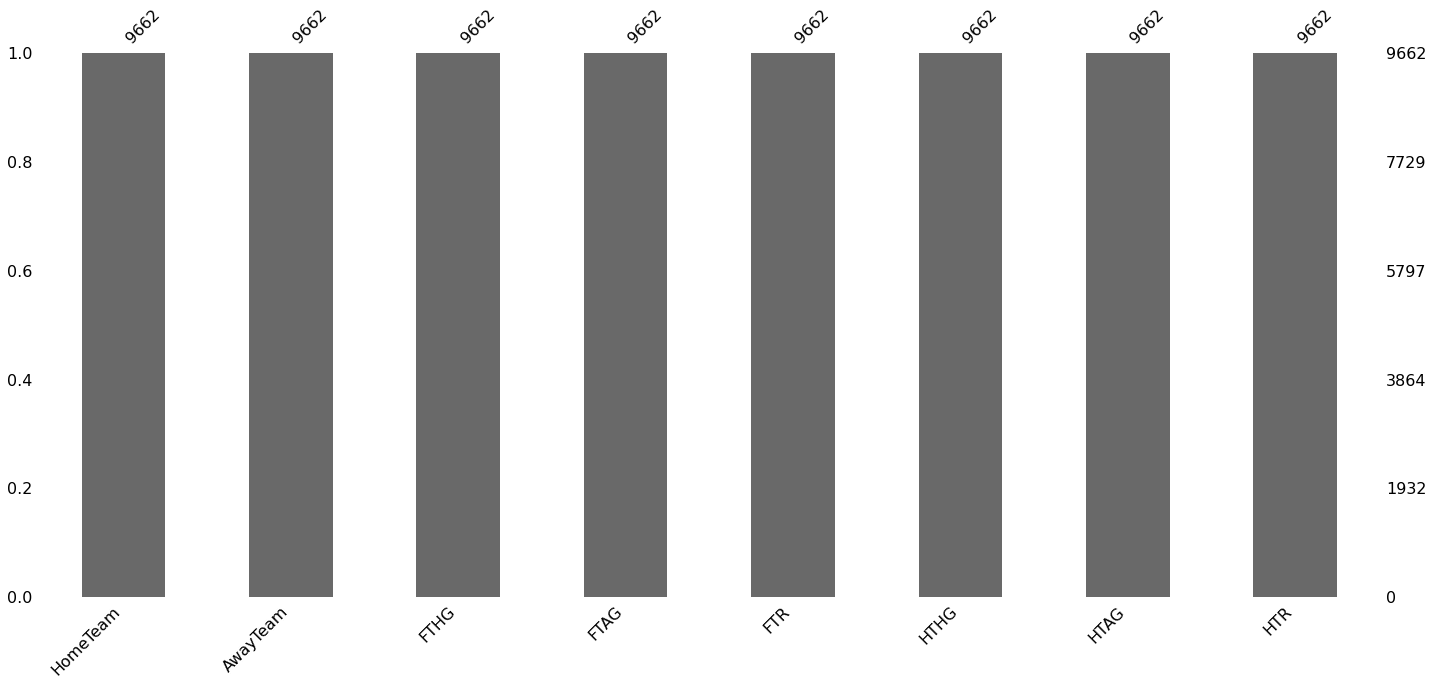

In [ ]:
import missingno as msno  # bar chart observation of missing values
msno.bar(df)
plt.show()

In [ ]:
# check variance of the dataset

df.var() 

HomeTeam    221.405778
AwayTeam    221.450391
FTHG          1.720369
FTAG          1.251371
FTR           0.522391
HTHG          0.710769
HTAG          0.486400
HTR           0.603878
dtype: float64

In [ ]:
# check unique numbers of FTR column
# there are three numbers, as FTR contains three values- H, A, D
# whereas H (HomeTeam Win) = 1, D (Draw) = 0, and A (AwayTeam Win) = 2

df['FTR'].unique() 

array([1, 2, 0])

In [ ]:
col = df.columns
col

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR'], dtype='object')

In [ ]:
categorical_col = ['HomeTeam','AwayTeam', 'HTR','FTAG','FTHG', 'HTAG','HTHG' ]

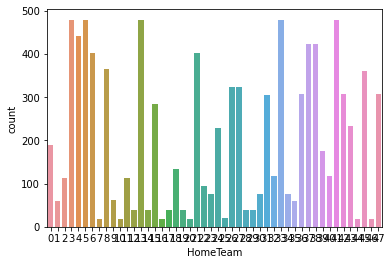

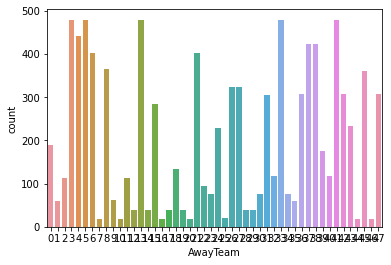

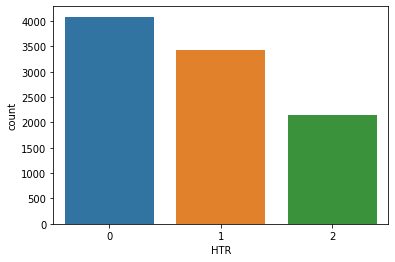

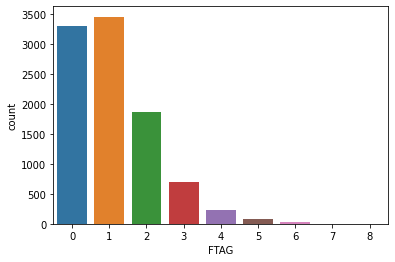

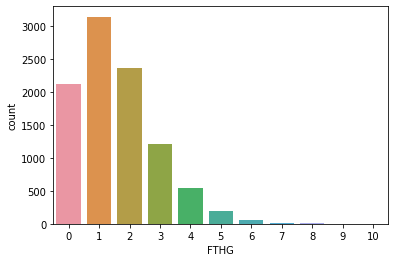

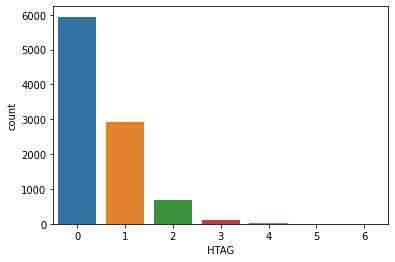

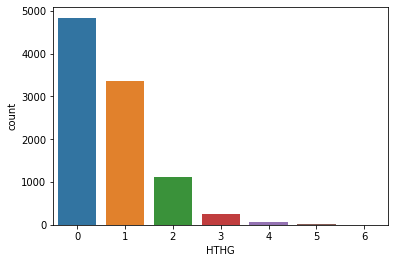

In [ ]:
#countplot of each column of the dataset
# it will show the numbers that each columns have

for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

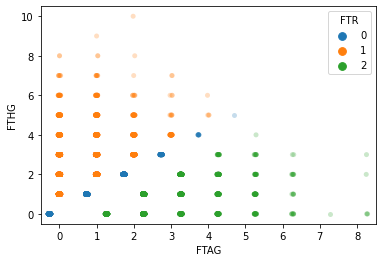

In [ ]:
# Show each observation with a scatterplot

sns.stripplot(x = "FTAG", y = "FTHG", hue = "FTR",
              data = df, dodge = True, jitter = True,
              alpha = .25, zorder = 1)

In [ ]:
# # swarm plot of the HTAG and HTHG columns with respect to FTR column

# f, ax = plt.subplots(figsize=(10, 10))
# ax=sns.swarmplot(x="HTHG", y="HTAG", hue="FTR",
#               palette="Dark2", data=df)
# ax=sns.set(style="darkgrid")

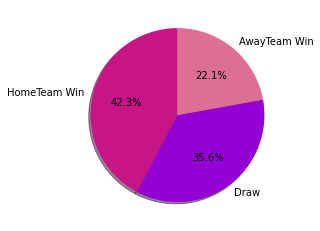

In [ ]:
# pie chart of Half Time Result (HTR)

labels = ["HomeTeam Win",'Draw', 'AwayTeam Win']
values = df['HTR'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['mediumvioletred', 'darkviolet', 'palevioletred']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

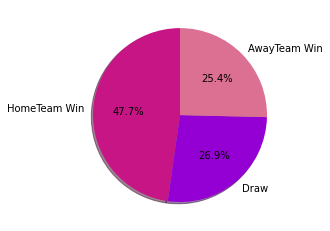

In [ ]:
# pie chart of Full Time Result (FTR)

labels = ["HomeTeam Win",'Draw', 'AwayTeam Win']
values = df['FTR'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['mediumvioletred', 'darkviolet', 'palevioletred']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [ ]:
# shuffling the row index of our dataset to avoid overfitting

shuffle_index = np.random.permutation(df.shape[0])       
df = df.iloc[shuffle_index]
df.head(20)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
1464,0,13,1,1,0,0,1,2
9471,8,31,1,1,0,0,0,0
7155,31,33,2,2,0,2,1,1
7608,8,4,2,0,1,0,0,0
6414,37,13,0,0,0,0,0,0
1042,33,42,3,1,1,2,1,1
1654,6,42,2,0,1,1,0,1
3564,21,8,3,0,1,3,0,1
2890,37,42,2,1,1,2,0,1
1492,3,47,2,0,1,1,0,1


# Getting ready before training the dataset

In [ ]:
# columns which will be used to train the model

cols_to_use = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG' , 'HTR' ]

In [ ]:
# assign the FTR column as the target column for prediction

X = df[cols_to_use]
y = df['FTR']

In [ ]:
# use StandardScaler to remove the mean and scales each feature/variable to unit variance

scale = StandardScaler()
scaled = scale.fit_transform(X)

In [ ]:
# split the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

In [ ]:
# shape of the X_train, y_train, X_test and y_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7729, 7), (7729,), (1933, 7), (1933,))

In [ ]:
X_val = X[-500:]
y_val = y[-500:]

# Build an ANN model for training and testing

In [ ]:
# build the ANN model for training and testing the dataset

input_dim = X_train.shape[1]
learning_rate = 0.0001


model = keras.Sequential([
    Dense(128, input_shape=(input_dim,), activation=keras.layers.LeakyReLU(alpha=0.3)),
    Dropout(0.1),
    Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3)),
    Dense(16, activation=keras.layers.LeakyReLU(alpha=0.3)),
    Dropout(0.2),
    Dense(12, activation=keras.layers.LeakyReLU(alpha=0.3)),
    Dropout(0.2),
    Dense(3, activation='softmax') 
])

In [ ]:
# define the optimizers and loss functions for training the model
# and also compile the model

from keras.optimizers import Adam

opt = Adam(lr=learning_rate, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              

In [ ]:
#fit the model for training

history = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size= 64, epochs= 20)

Epoch 1/20
121/121 [==============================] - 1s 4ms/step - loss: 1.7756 - accuracy: 0.3870 - val_loss: 1.0297 - val_accuracy: 0.4760
Epoch 2/20
121/121 [==============================] - 0s 2ms/step - loss: 1.1283 - accuracy: 0.4259 - val_loss: 0.9863 - val_accuracy: 0.5040
Epoch 3/20
121/121 [==============================] - 0s 3ms/step - loss: 1.0354 - accuracy: 0.4914 - val_loss: 0.9132 - val_accuracy: 0.5520
Epoch 4/20
121/121 [==============================] - 0s 3ms/step - loss: 0.9736 - accuracy: 0.5433 - val_loss: 0.8232 - val_accuracy: 0.5820
Epoch 5/20
121/121 [==============================] - 0s 3ms/step - loss: 0.9174 - accuracy: 0.5706 - val_loss: 0.7171 - val_accuracy: 0.6520
Epoch 6/20
121/121 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.6182 - val_loss: 0.6022 - val_accuracy: 0.8040
Epoch 7/20
121/121 [==============================] - 0s 3ms/step - loss: 0.7768 - accuracy: 0.6442 - val_loss: 0.5188 - val_accuracy: 0.8680
Epoch 

# Evaluate the performance of the model

In [ ]:
# accuracy of the training and validation set

train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

16/16 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9900
Training loss: 0.13646969199180603
Training accuracy: 0.9892612099647522
Validation loss: 0.13186132907867432
Validation accuracy: 0.9900000095367432


In [ ]:
# accuracy of test dataset

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

61/61 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9938
Test loss: 0.13519445061683655
Test accuracy: 0.9937920570373535


In [ ]:
# predict the model

labels = ['Draw','Home' , 'Away']
y_preds = model.predict(X_test)
y_pred_argmax = [np.argmax(i) for i in y_preds]
print(classification_report(y_test, y_pred_argmax, target_names=labels))
print(confusion_matrix(y_test, y_pred_argmax))

              precision    recall  f1-score   support

        Draw       1.00      0.98      0.99       490
        Home       0.99      1.00      1.00       923
        Away       0.99      1.00      1.00       520

    accuracy                           0.99      1933
   macro avg       0.99      0.99      0.99      1933
weighted avg       0.99      0.99      0.99      1933

[[478   9   3]
 [  0 923   0]
 [  0   0 520]]


# Plot a Confusion Matrix

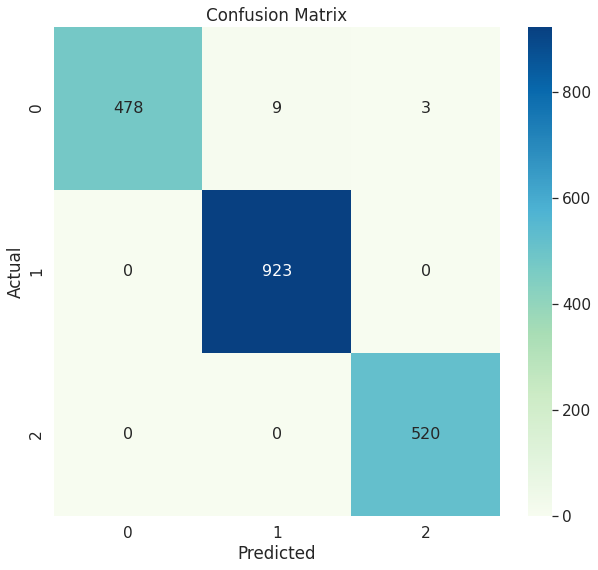

In [ ]:
# plot the confusion matrix to oberve the prediction


from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(y_test, y_pred_argmax)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="GnBu", annot=True, fmt= 'g', annot_kws={"size": 16})